# Lab 3: Quantum Teleportation

In quantum teleportation, the properties of quantum entanglement are used to send a qubit between observers without physically moving the involved qubit. The qubits themselves are not really teleported, but the state of one qubit is destroyed on one side and extracted on the other side, so the information that the state encodes is communicated. The process is not instantaneous, because information must be communicated classically between observers as part of the process. The usefulness of quantum teleportation lies in its ability to send quantum information arbitrarily far distances without exposing quantum states to thermal decoherence from the environment or other adverse effects.

This may sound a bit like science fiction, but quantum teleportation can in principle be used to actually teleport macroscopic objects (in the sense that two objects in exactly the same quantum state are identical). However, the number of entangled states necessary to accomplish this is well outside anything physically achievable, since maintaining such a massive number of entangled states without decohering is a difficult problem!


### Objectives

• Implement a quantum algorithm; and

• Understand the principles on quantum teleportation and how it can be implemented/applied.


## Contents    
1. [Introduction](#intro)   
    1.1 [A qiskit Reminder](#qiskit)         
2. [Teleportation Protocol](#pauli)    
3. [Test your circuits in a real Quantum Computer!! ](#IBMpc)    

## 1. Introduction <a id="intro"></a>

Alice wants to send quantum information to Bob. Specifically, suppose she wants to send the qubit state
$\vert\psi\rangle = \alpha\vert0\rangle + \beta\vert1\rangle$. 
This entails passing on information about $\alpha$ and $\beta$ to Bob.

There exists a theorem in quantum mechanics which states that you cannot simply make an exact copy of an unknown quantum state. This is known as the no-cloning theorem. As a result of this we can see that Alice can't simply generate a copy of $\vert\psi\rangle$ and give the copy to Bob. We can only copy classical states (not superpositions).

However, by taking advantage of two classical bits and an entangled qubit pair, Alice can transfer her state $\vert\psi\rangle$ to Bob. We call this teleportation because, at the end, Bob will have $\vert\psi\rangle$ and Alice won't anymore. 

### 1.1 A `qiskit` Reminder  <a id="qiskit"></a>

From Lab 1, you should be familiar with Jupyter and python syntax,and from Lab 2 you should now be familiar with `qiskit`, quantum gates, and how to operate with them. Again, the first thing to do is to import some packages. Below I give all the ones I expect to be necessary for this Lab:

In [3]:
from qiskit import *
import numpy as np
from math import pi, sqrt
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit.extensions import Initialize
from qiskit.quantum_info import random_statevector
sim = Aer.get_backend('aer_simulator')

First, here is a reminder of how to create a circuit and some things you can do with it:

In [4]:
#Example Circuit: 
exCirc = QuantumCircuit(2,2)      #  The argument indicates 2 quantum registes and 2 classical registers

Now we can initialise our qubits. Note that there are two ways to do this:  
    1. we can use `quiskit` automatic initialisation at $|0\rangle$ or apply a Pauli-X gate to initialise it at $|1\rangle$, or   
    2.  we can initialise it in a random (but normalised) state, by using `random_statevector(2)`.
These are shown as follows:

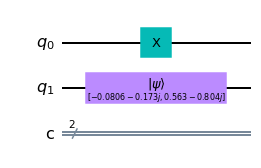

In [5]:
exCirc.x(0)                            # Initialises the first qubit to |1>

psi = random_statevector(2)            # Select a random (but normalised) state
exCirc.append(Initialize(psi), [1])    # Initialise the second qubit into our state psi

exCirc.draw(output='mpl')              # Print the circuit to the screen to check everything is as it should

We can measure this, and visualise the data in two ways: Hystograms or Block Sphere. Here are the latter

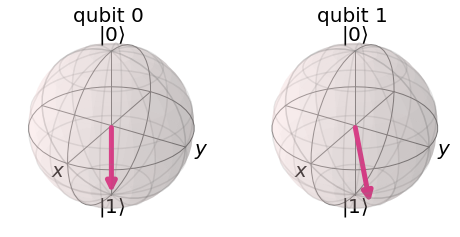

In [6]:
exCirc.save_statevector()
out_vector_ex = sim.run(exCirc).result().get_statevector()
plot_bloch_multivector(out_vector_ex)

To plot the data as histograms, we first need to perform some measurements. This is done as follows:

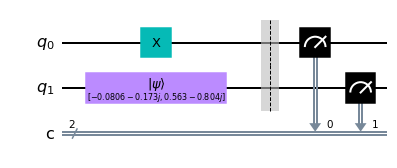

In [7]:
exCirc.measure([0,1],[0,1])
exCirc.draw(output='mpl')

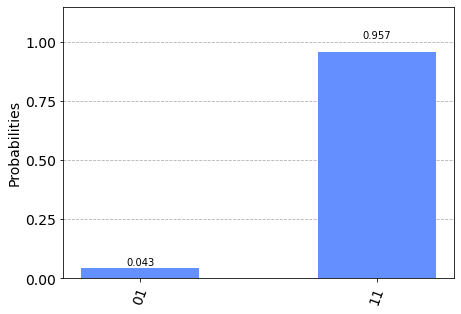

In [8]:
result = execute(exCirc, backend = sim).result()
counts = result.get_counts()
plot_histogram(counts)

Now, a few comments: 

- there are two numbers on the x axis for each bar (a combination of 0 and 1). They are represent each qubit, and are read from bottom up in the circuit diagram. For example, 01 in the histogram means 0 in the second qubit and 1 in the first qubit. 
- You can print the Bloch spheres after a measurement. This is okay! However, after a measurement the qunatum state will have collapsed and your spheres will only show wither $0\rangle$ or $|1\rangle$

## 2. Teleportation Protocol <a id="pauli"></a>

We have seen in class that to transfer a quantum bit ('teleport the information from a qubit to another), Alice and Bob must perform the following steps:

#### Step 1

Use a third party entangled qubit pair, 

#### Step 2

Alice should then perform some operations on her qubit,

#### Step 3

Then send the results to Bob over a classical communication channel, and finally

#### Step 4

Bob then performs some operations on his end to receive Alice’s qubit.

### Question 1: 

Follow the steps above, and the knowlege of `qiskit` you now have from Lab 2 to create an entanglement protocol. You may also benefit from the little revision above which introduce a couple of new features of `qiskit`

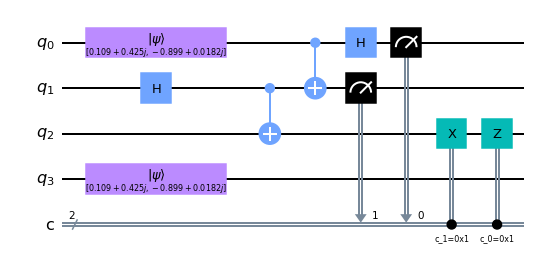

In [9]:
q = QuantumCircuit(4,2)

psi = random_statevector(2)
q.append(Initialize(psi), [0])
q.append(Initialize(psi), [3])


q.h(1)
q.cx(1,2)

q.cx(0,1)
q.h(0)

q.measure(0,0)
q.measure(1,1)

q.x(2).c_if(1, 1)
q.z(2).c_if(0, 1)

q.draw(output='mpl')

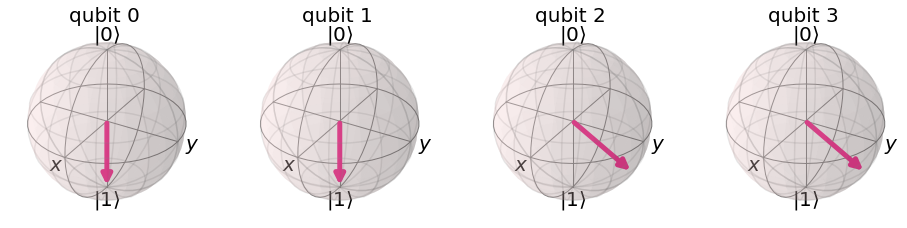

In [10]:
q.save_statevector()
qobj = assemble(q)
out_vector_ex = sim.run(q).result().get_statevector()
plot_bloch_multivector(out_vector_ex)

## 3. Test your circuits in a real Quantum Computer!! <a id="IBMpc"></a>

You can again test all of the above in a real, IBM Quantum Computer! Here is the link:

https://quantum-computing.ibm.com/composer/

As done last week, in order for this to work, you will need to sign into your account. Note that it might take a few minuts (or more) for your code to run as it will be placed in a queue. So be mindful that you might not have time to complete this in the lab, but you should still ask the demonstrators how to do this if you need to during the session.  

### Question 2: 

**2(a):** Use IBM composer and compare its results to what you obtained above. Are they different? How so?  

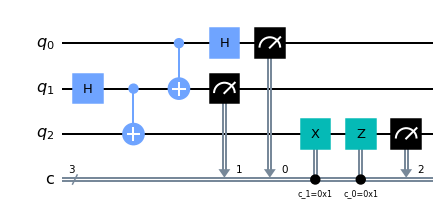

In [14]:
q = QuantumCircuit(3,3)

psi = random_statevector(2)

q.h(1)
q.cx(1,2)

q.cx(0,1)
q.h(0)

q.measure(0,0)
q.measure(1,1)

q.x(2).c_if(1, 1)
q.z(2).c_if(0, 1)

q.measure(2,2)

q.draw(output='mpl')

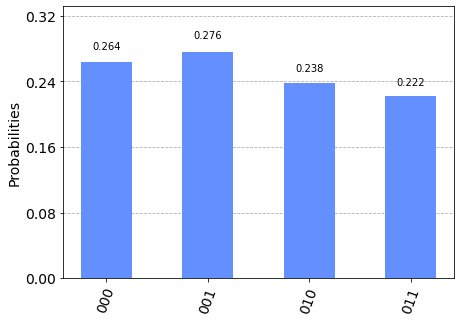

In [15]:
result = execute(q, backend = sim).result()
counts = result.get_counts()
plot_histogram(counts)

**2(b):** Now that you have implemented it, what could quantum telleortation be used for and why is it important? 